In [8]:
# knn_animal_classification.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

First few rows of the dataset:
  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4

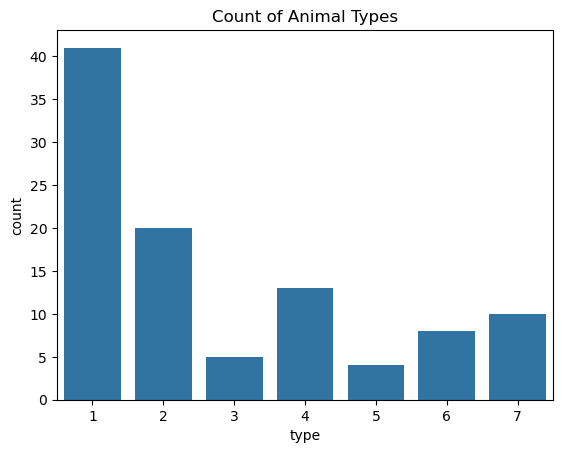

ValueError: could not convert string to float: 'aardvark'

In [9]:
# Step 1: Load and Visualize the Data
df = pd.read_csv('Zoo.csv')  # Replace with actual dataset file name
print("First few rows of the dataset:")
print(df.head())

print("\nData Summary:")
print(df.describe())

# Visualizations
sns.countplot(x='type', data=df)
plt.title('Count of Animal Types')
plt.show()

sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# Step 2: Preprocessing
# Handle missing values (if any)
if df.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='most_frequent')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check for outliers (basic visualization)
df.drop('animal_name', axis=1, inplace=True, errors='ignore')  # Drop non-numeric column if present


In [16]:
# Step 3: Train-Test Split
# Drop non-numeric columns like animal name if present
X = df.drop('type', axis=1)
y = df['type']

# Fix column name if needed (check actual column name)
if 'animal name' in X.columns:
    X = X.drop('animal name', axis=1)

# Check if all columns are numeric now
print("Non-numeric columns:", X.select_dtypes(exclude='number').columns)

# Proceed with scaling only if all are numeric
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Non-numeric columns: Index([], dtype='object')


In [17]:
# Step 4: Implement KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')  # Euclidean distance (p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Step 5: Evaluation
y_pred = knn.predict(X_test)
print("\nEvaluation Metrics:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Evaluation Metrics:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21

Accuracy Score: 0.9523809523809523
Confusion Matrix:
 [[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


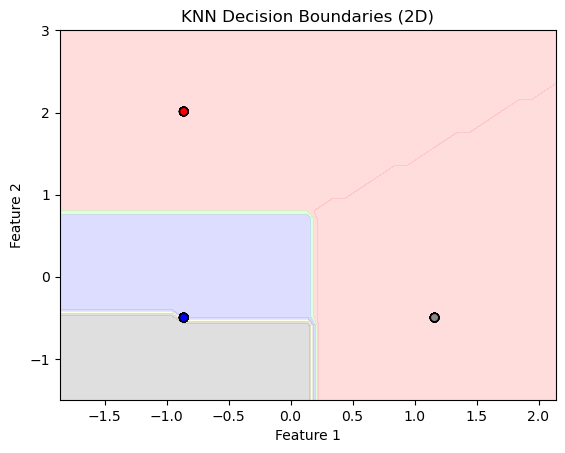

In [19]:
# Step 6: Visualize decision boundaries (using only 2 features for simplicity)
def plot_decision_boundaries(X, y, model, title):
    X = X[:, :2]
    model.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#AFAFAF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFD700', '#888888']))
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundaries(X_train, y_train, KNeighborsClassifier(n_neighbors=5), "KNN Decision Boundaries (2D)")